<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Check-for-gaps" data-toc-modified-id="Check-for-gaps-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Check for gaps</a></span></li><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Check for duplicates</a></span></li><li><span><a href="#OHE-conversion" data-toc-modified-id="OHE-conversion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>OHE conversion</a></span></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Sampling</a></span></li><li><span><a href="#Feature-scaling" data-toc-modified-id="Feature-scaling-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Feature scaling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Problem-research" data-toc-modified-id="Problem-research-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem research</a></span><ul class="toc-item"><li><span><a href="#Train-the-models-and-see-their-accuracy" data-toc-modified-id="Train-the-models-and-see-their-accuracy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train the models and see their accuracy</a></span></li><li><span><a href="#Preliminary-evaluation-of-the-results" data-toc-modified-id="Preliminary-evaluation-of-the-results-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preliminary evaluation of the results</a></span></li><li><span><a href="#Evaluation-of-other-metrics-for-each-model" data-toc-modified-id="Evaluation-of-other-metrics-for-each-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Evaluation of other metrics for each model</a></span></li></ul></li><li><span><a href="#Fighting-imbalance" data-toc-modified-id="Fighting-imbalance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fighting imbalance</a></span><ul class="toc-item"><li><span><a href="#Getting-rid-of-the-imbalance-increasing-the-sample" data-toc-modified-id="Getting-rid-of-the-imbalance-increasing-the-sample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Getting rid of the imbalance increasing the sample</a></span></li><li><span><a href="#Training-models-on-a-balanced-sample" data-toc-modified-id="Training-models-on-a-balanced-sample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Training models on a balanced sample</a></span></li><li><span><a href="#Training-models-with-weights" data-toc-modified-id="Training-models-with-weights-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Training models with weights</a></span></li></ul></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Customer churn

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large *F1*-measure. To pass the project successfully, you need to bring the metric to 0.59. Check the *F1*-measure on the test set yourself.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Data preparation

### Data exploration

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# load data into dataframe
data = pd.read_csv('Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Data preprocessing

In [4]:
# Let's bring the names of the columns to the generally accepted register
data.columns = map(str.lower, data.columns)
data = data.rename(columns={'creditscore' : 'credit_score', 'numofproducts' : 'num_of_products', 
                            'hascrcard' : 'has_cr_card', 'isactivemember' : 'is_active_member', 
                            'estimatedsalary' : 'estimated_salary'})
data.head()

,rownumber,customerid,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Check for gaps

In [5]:
# Check the number of passes
data.isna().sum()

rownumber             0
customerid            0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [6]:
data['tenure'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

Since it is important for model training that there are no gaps, we will fill them with the value "-999".

In [7]:
data['tenure'] = data['tenure'].fillna(-999)
data['tenure'].sort_values().unique()

array([-999.,    0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,
          8.,    9.,   10.])

In [8]:
# Cast data type 'tenure' to int
data['tenure'] = data['tenure'].astype(int)

In [9]:
data.isna().sum()

rownumber           0
customerid          0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

**Conclusions:**

The target attribute is `exited`. The problem will be solved by classification methods.

### Check for duplicates

In [10]:
# Check data for duplicates
data.duplicated().sum()

0

In [11]:
data['customerid'].duplicated().sum()

0

No duplicates were found in the data. So we can remove the `customerid` column. The information in it also does not affect the quality of model training.

In [12]:
# Remove the 'customerid' column
del data['customerid']

# Remove the 'rownumber' column since it duplicates the row numbers of the dataframe
del data['rownumber']

# Delete the 'surname' column since the information in it is redundant for model training
del data['surname']
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### OHE conversion

We will transform the data using the OHE method.

In [13]:
data = pd.get_dummies(data, drop_first=True)
data.columns = map(str.lower, data.columns)
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
data.shape

(10000, 12)

As can be seen from the transformation, the dummy trap was avoided. Since the gender column contained 2 values and the country column 3, using `drop_first=True` left 3 columns instead of 5.

### Sampling

We divide the original dataset into three samples:
    
     1. Educational -- 60% of the original
     2. Validation -- 20% of the original
     3. Test -- 20% of the original

In [15]:
# Divide the dataset into features and target feature
features = data.drop(['exited'], axis=1)
target = data['exited']

In [16]:
# Divide the dataset into parts defined earlier
features_validtest, features_train, target_validtest, target_train = train_test_split(features, target, 
                                                                                      test_size=0.6, 
                                                                                      random_state=12345,
                                                                                      stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(features_validtest, 
                                                                            target_validtest, 
                                                                            test_size=0.5, 
                                                                            random_state=12345,
                                                                            stratify=target_validtest)

In [17]:
# Check sample sizes
print('Initial:')
print(features.shape)
print(target.shape)

print('Validation:')
print(features_valid.shape)
print(target_valid.shape)

print('Test:')
print(features_test.shape)
print(target_test.shape)

print('Educational:')
print(features_train.shape)
print(target_train.shape)

Initial:
(10000, 11)
(10000,)
Validation:
(2000, 11)
(2000,)
Test:
(2000, 11)
(2000,)
Educational:
(6000, 11)
(6000,)


### Feature scaling

Let's scale features that are out of range [0, 1].

In [18]:
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
# Create an array of features for scaling
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# Let's create an object and set it up on the training data
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

C:\Users\kacharhin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\kacharhin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\kacharhin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [20]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
5238,0.753887,-0.845717,0.308802,0.759823,-0.893492,1,0,1.076681,0,0,1
784,1.002729,1.789258,0.322677,0.634341,-0.893492,1,1,1.572643,1,0,1
6541,1.013097,-0.375186,0.315740,0.460392,-0.893492,1,1,0.865384,0,1,1
492,-0.117059,-0.092867,0.312271,0.075528,0.807317,0,1,0.324444,0,0,0
534,-1.039847,0.095345,-3.166780,0.602856,-0.893492,1,0,-0.806007,0,0,0


In [21]:
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7349,-0.189638,0.283558,0.319208,-0.271351,0.807317,0,1,0.832591,1,0,1
7861,-0.448848,-1.033930,0.301865,0.949776,0.807317,1,1,0.178001,0,1,1
2062,0.546519,-0.939823,0.308802,0.727112,-0.893492,0,1,-0.304700,1,0,0
1941,-2.055951,0.471770,0.308802,0.193920,-0.893492,1,0,-0.533143,0,1,1
2325,1.158255,-0.939823,0.333083,0.621992,0.807317,1,0,0.834044,0,1,1


In [22]:
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
6577,0.380624,-0.092867,0.312271,0.655556,-0.893492,0,1,-0.207719,1,0,1
3909,-2.273688,2.259789,0.319208,1.352406,-0.893492,1,1,1.177792,0,0,1
868,-0.490322,0.471770,0.319208,0.502667,0.807317,1,0,0.141945,1,0,1
3769,0.494677,0.754089,0.315740,1.276570,0.807317,0,0,-1.727748,0,0,1
1651,-0.168901,-0.751611,0.329614,0.510867,-0.893492,1,1,1.377544,0,1,1


### Conclusion

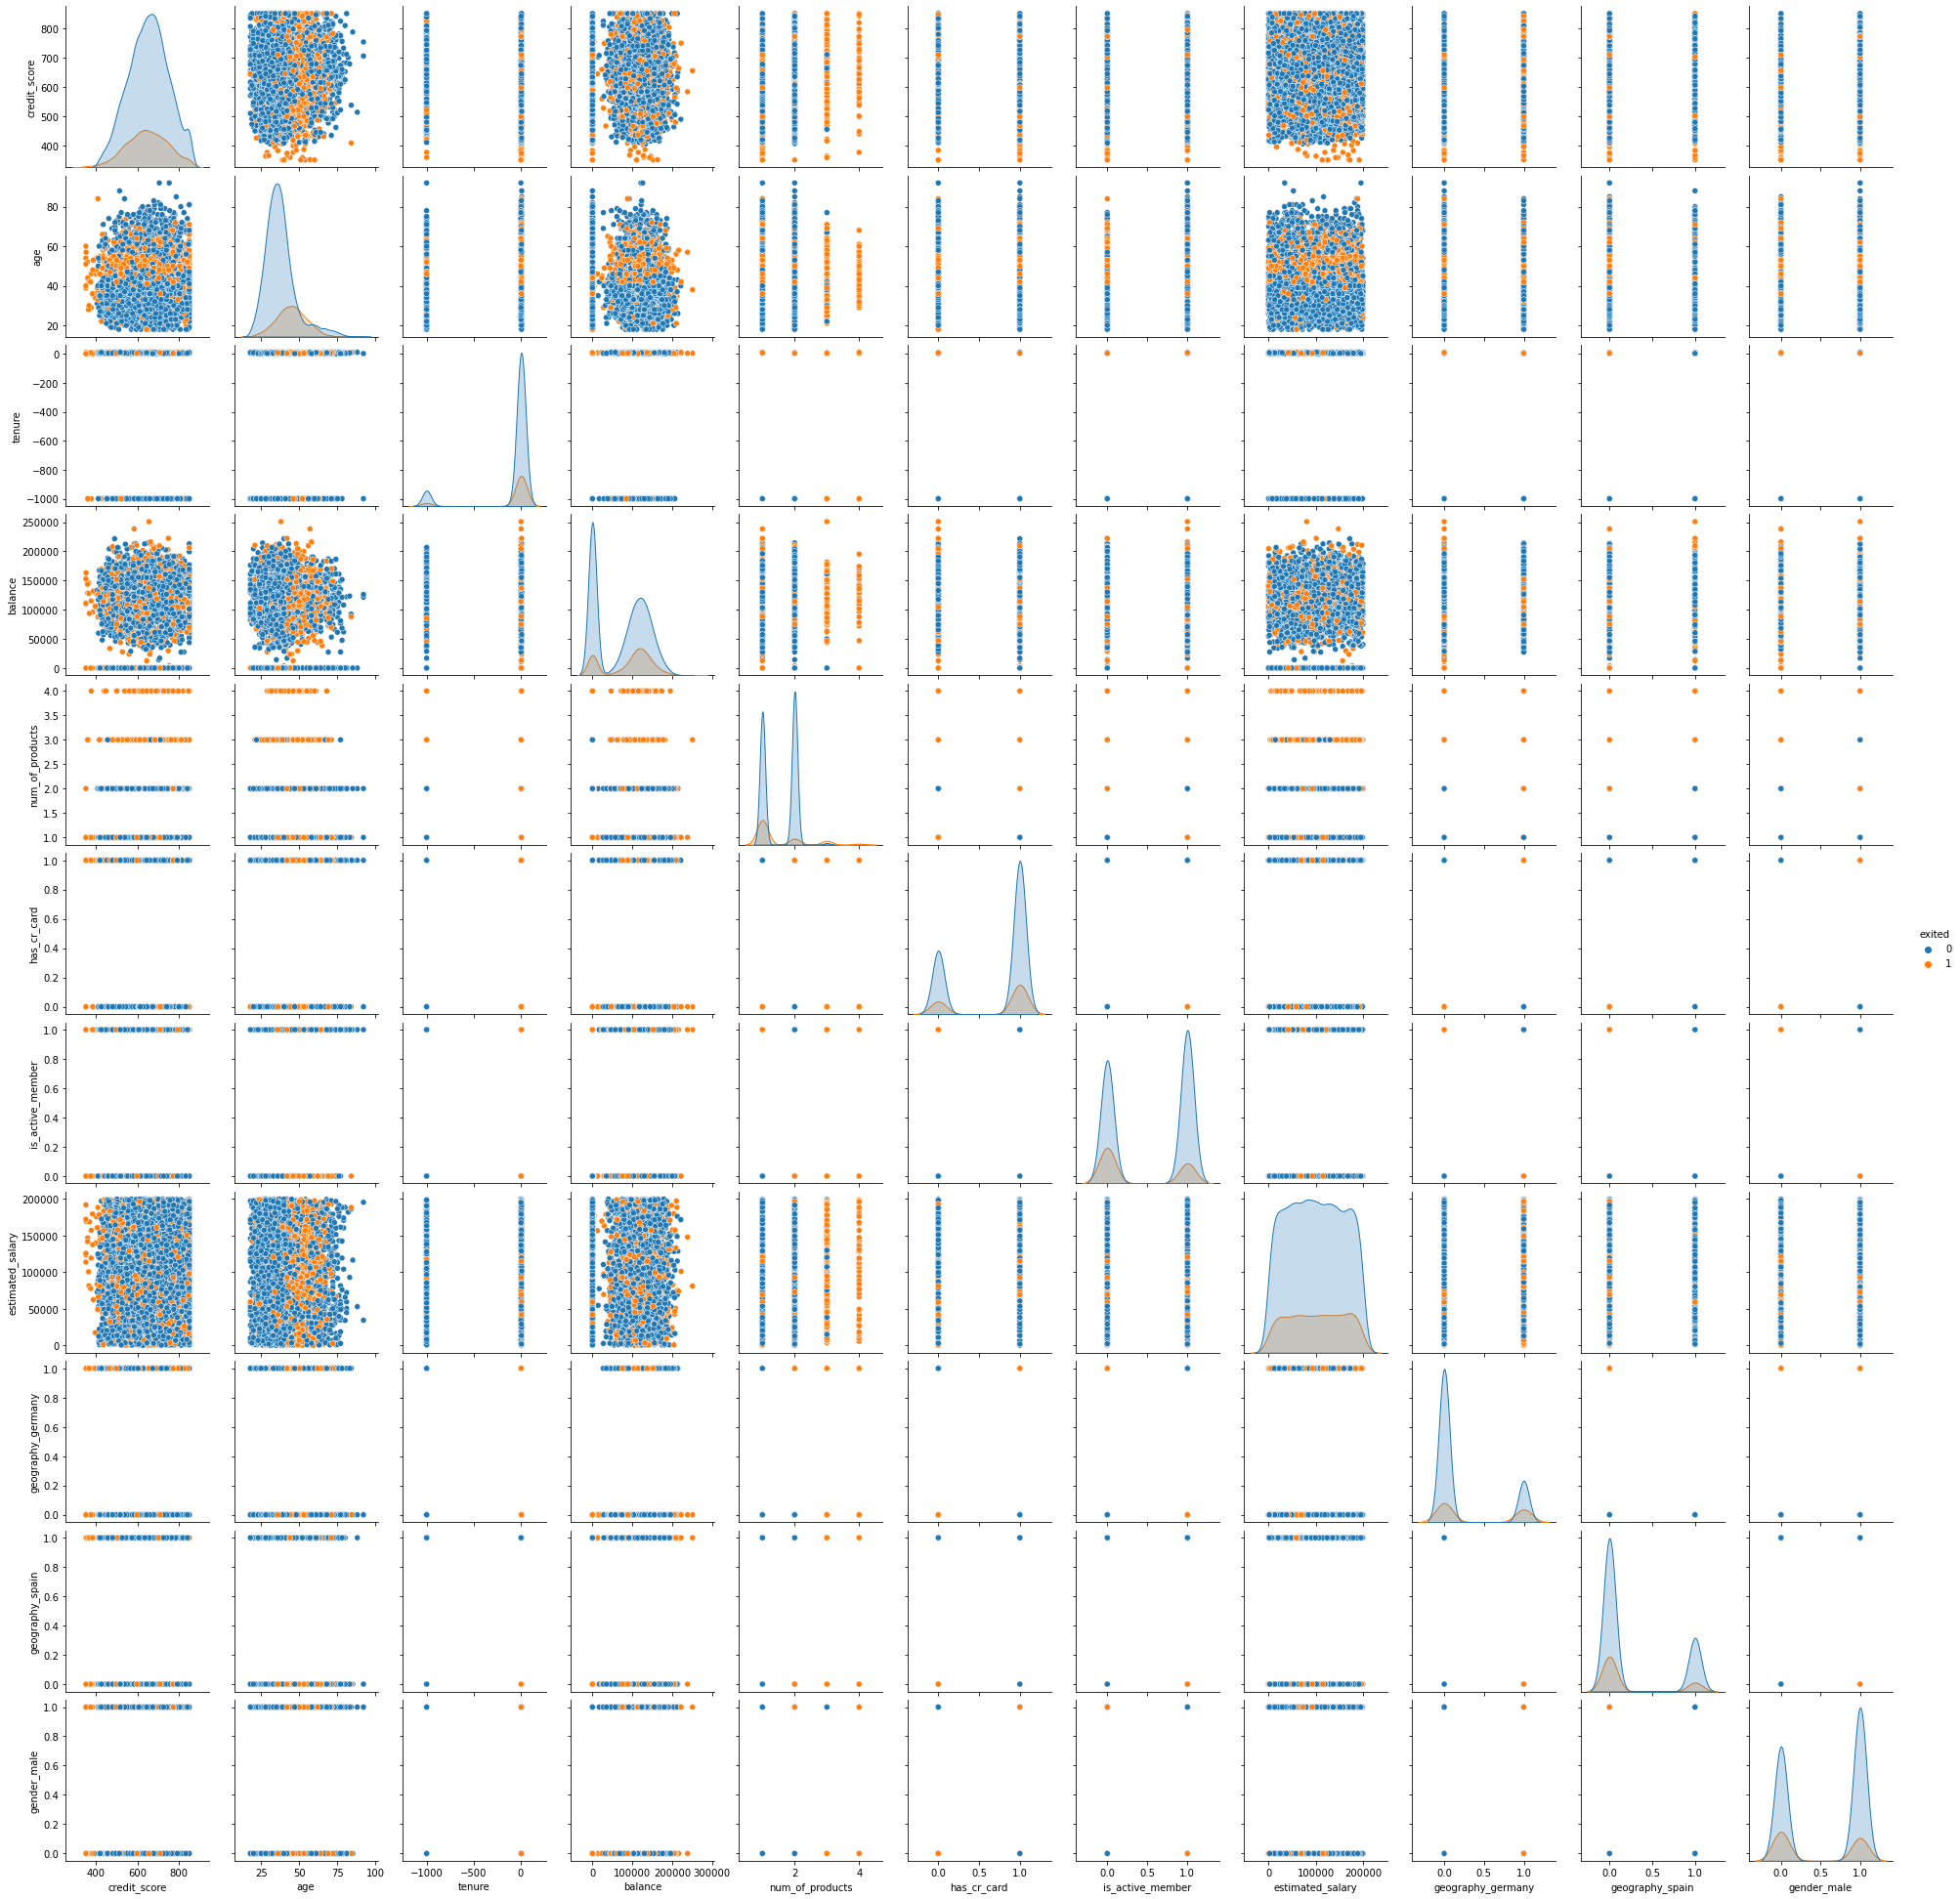

In [23]:
# see the relationship of data
sns.pairplot(data, hue='exited');

**Conclusion:**

Prepared data for machine learning. Data checked for gaps (filled -999) and duplicates. Performed OHE transformation with dummy trap exception. The data is divided into samples (training, validation, test). The data is scaled. 

## Problem research

### Train the models and see their accuracy

We will train three types of models: decision tree, random forest and logistic regression. Validation will be based on a validation set and cross-validation tests.

In [24]:
# Decision tree function 
def decision_tree(features_train, target_train, features_valid, target_valid):
    best_model_decision_tree = None
    best_result_decision_tree = 0

    for samples_leaf in range(1, 4):
        for depth in range(1, 11):
            model = DecisionTreeClassifier(random_state=12345, 
                                           max_depth=depth, max_features='auto', 
                                           min_samples_leaf=samples_leaf)
            model.fit(features_train, target_train) 
            predictions_valid_decision_tree = model.predict(features_valid)
            result = accuracy_score(target_valid, predictions_valid_decision_tree)
            if result > best_result_decision_tree:
                best_model_decision_tree = model 
                best_result_decision_tree = result
                best_max_depth = depth
                best_samples_leaf = samples_leaf
                best_max_features = features

    decision_tree_params = {'max_depth': range(1, 11), 
                            'min_samples_leaf' : range(1, 4)}
    model_grid = GridSearchCV(model, decision_tree_params, 
                              cv=5, n_jobs=-1, verbose=True)
    model_grid.fit(features_train, target_train)


    print('For the validation set:')
    print('Quality of the model on the validation set:', best_result_decision_tree)
    print('Optimal parameters on the validation sample:')
    print('max_depth = ', best_max_depth)
    print('min_samples_leaf = ', best_samples_leaf)
    print()
    print('For cross-validation:')
    print('Best parameters:', model_grid.best_params_)
    print('Best score:', model_grid.best_score_)
    print('Average score of correct answers:', accuracy_score(target_valid, model_grid.predict(features_valid)))
    
    return best_model_decision_tree
    
best_model_decision_tree = decision_tree(features_train, target_train, features_valid, target_valid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
For the validation set:
Quality of the model on the validation set: 0.8525
Optimal parameters on the validation sample:
max_depth =  5
min_samples_leaf =  1

For cross-validation:
Best parameters: {'max_depth': 5, 'min_samples_leaf': 3}
Best score: 0.8488333333333333
Average score of correct answers: 0.8525


In [25]:
# Random Forest Function
def random_forest(features_train, target_train, features_valid, target_valid):
    
    best_model_random_forest = None
    best_result_random_forest = 0

    for est in range(1, 50):
        for depth in range(1, 11):
            model = RandomForestClassifier(random_state=12345, 
                                           n_estimators=est, max_depth=depth, 
                                           max_features='auto')
            model.fit(features_train, target_train) 
            predictions_valid = model.predict(features_valid)
            result = accuracy_score(predictions_valid, target_valid)
            if result > best_result_random_forest:
                best_model_random_forest = model
                best_result_random_forest = result
                best_max_depth = depth
                best_n_estimators = est
                
    forest_params = {'max_depth': range(1, 11),
                     'n_estimators' : range(1, 50)}

    model_grid = GridSearchCV(model, forest_params,
                              cv=5, n_jobs=-1,
                              verbose=True)

    model_grid.fit(features_train, target_train)

    print('For validation set:')
    print('Quality of the model on the validation set:', best_result_random_forest)
    print('Optimal parameters on the validation set:')
    print('max_depth = ', best_max_depth)
    print('n_estimators = ', best_n_estimators)
    print()
    print('For cross-validation:')
    print('Best parameters:', model_grid.best_params_)
    print('Best score:', model_grid.best_score_)
    print('Average score of correct answers:', accuracy_score(target_valid, model_grid.predict(features_valid)))
    
    return best_model_random_forest

best_model_random_forest = random_forest(features_train, target_train, features_valid, target_valid)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
For validation set:
Quality of the model on the validation set: 0.859
Optimal parameters on the validation set:
max_depth =  10
n_estimators =  14

For cross-validation:
Best parameters: {'max_depth': 10, 'n_estimators': 47}
Best score: 0.8640000000000001
Average score of correct answers: 0.857


In [26]:
# Function for logistic regression
def logistic_regression(features_train, target_train, features_valid, target_valid):
    
    # Check solver='lbfgs'
    best_model_logistic_regression = None
    best_result_logistic_regression = 0

    for iter_value in range(100, 1000, 10):
        model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter_value)
        model.fit(features_train, target_train)
        model.predict(features_valid)
        result = model.score(features_valid, target_valid)
        if result > best_result_logistic_regression:
            best_model_logistic_regression = model
            best_result_logistic_regression = result
            best_max_iter = iter_value

    # Check solver='liblinear'
    best_model_logistic_regression = None
    best_result_logistic_regression = 0

    for i in range(100, 1000, 10):
        model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=i)
        model.fit(features_train, target_train)
        model.predict(features_valid)
        result = model.score(features_valid, target_valid)        
        if result > best_result_logistic_regression:
            best_model_logistic_regression = model
            best_result_logistic_regression = result
            best_max_iter = iter_value

    # Check solver='saga'
    model = LogisticRegression(random_state=12345, solver='saga', max_iter=1000)
    model.fit(features_train, target_train)
    model.predict(features_valid)
    model.score(features_valid, target_valid)

    print('For lbfgs:')
    print('Best estimate:', best_result_logistic_regression)
    print('Optimal number of iterations:', best_max_iter)
    print()
    print('For liblinear:')
    print('Best estimate:', best_result_logistic_regression)
    print('Optimal number of iterations:', best_max_iter)
    print()
    print('For saga:')
    print('Best Score:', model.score(features_valid, target_valid))
    
    return best_model_logistic_regression
    
    return best_model_logistic_regression

best_model_logistic_regression = logistic_regression(features_train, target_train, features_valid, target_valid)

For lbfgs:
Best estimate: 0.8175
Optimal number of iterations: 990

For liblinear:
Best estimate: 0.8175
Optimal number of iterations: 990

For saga:
Best Score: 0.8175


Accuracy for models:

     1. Decision tree = 0.8525
     2. Random Forest = 0.857
     3. Logistic regression = 0.8175

### Preliminary evaluation of the results

Accuracy for models:

     1. Decision tree = 0.8525
     2. Random Forest = 0.857
     3. Logistic regression = 0.8175

Let's check the class balance now

0    0.7963
1    0.2037
Name: exited, dtype: float64


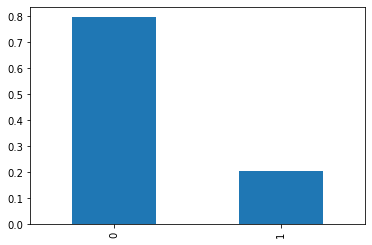

In [27]:
class_frequency = data['exited'].value_counts(normalize=True, ascending=False)
print(class_frequency)

class_frequency.plot(kind='bar');

As you can see, class `0` takes 80%, and class `1` only 20. There is a clear imbalance. Let's evaluate the predictions for our models.

In [28]:
design_tree_share = pd.Series(best_model_decision_tree.predict(features_valid)).value_counts(normalize = 1)
    
random_forest_share = pd.Series(best_model_random_forest.predict(features_valid)).value_counts(normalize = 1)
    
logistic_regression_share = pd.Series(best_model_logistic_regression.predict(features_valid)).value_counts(normalize = 1)
    
print("Response shares:" "decision tree =", design_tree_share,
      "random forest=", random_forest_share,
      "logistic regression =", logistic_regression_share , end='')

Response shares:decision tree = 0    0.8895
1    0.1105
dtype: float64 random forest= 0    0.893
1    0.107
dtype: float64 logistic regression = 0    0.9275
1    0.0725
dtype: float64

Let's create a constant model to compare the previously obtained results with it.

In [29]:
# Estimating Predictions for a Constant Model
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.shape

(2000,)

In [30]:
accuracy_score_constant = accuracy_score(target_valid, target_predict_constant)
accuracy_score_constant

0.796

Thus, models tend to give a negative answer more often than a positive one. Therefore, it is highly likely that good accuracy is due to the tendency to the same answers. Let's check other metrics for the considered models.

### Evaluation of other metrics for each model

In [31]:
# create a function to evaluate metrics
def rec_prec_f1(target_valid, prediction):
    print('completeness' , recall_score(target_valid, prediction))
    print('Accuracy', precision_score(target_valid, prediction))
    print('F1-measure', f1_score(target_valid, prediction))
    print('AUC-ROC', roc_auc_score(target_valid, prediction))

In [32]:
prediction_decision_tree = best_model_decision_tree.predict(features_valid)
confusion_matrix(target_valid, prediction_decision_tree)

array([[1538,   54],
       [ 241,  167]], dtype=int64)

In [33]:
# Let's Estimate Decision Tree Metrics
rec_prec_f1(target_valid, prediction_decision_tree)

completeness 0.40931372549019607
Accuracy 0.755656108597285
F1-measure 0.5310015898251192
AUC-ROC 0.6876970637501231


In [34]:
prediction_random_forest = best_model_random_forest.predict(features_valid)
confusion_matrix(target_valid, prediction_random_forest)

array([[1548,   44],
       [ 238,  170]], dtype=int64)

In [35]:
# Let's estimate the metrics for a random forest
rec_prec_f1(target_valid, prediction_random_forest)

completeness 0.4166666666666667
Accuracy 0.794392523364486
F1-measure 0.5466237942122186
AUC-ROC 0.6945142378559465


In [36]:
prediction_logistic_regression = best_model_logistic_regression.predict(features_valid)
confusion_matrix(target_valid, prediction_logistic_regression)

array([[1541,   51],
       [ 314,   94]], dtype=int64)

In [37]:
rec_prec_f1(target_valid, prediction_logistic_regression)

completeness 0.23039215686274508
Accuracy 0.6482758620689655
F1-measure 0.3399638336347197
AUC-ROC 0.599178490491674


Obviously, the quality of the models leaves much to be desired. Low `F-1` measure, prone to false positive `FP` predictions.

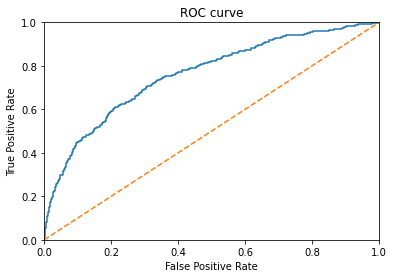

In [38]:
# ROC curve for logistic regression under imbalance
probabilities_one_valid = best_model_logistic_regression.predict_proba(features_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Fighting imbalance

### Getting rid of the imbalance increasing the sample

0    0.7963
1    0.2037
Name: exited, dtype: float64


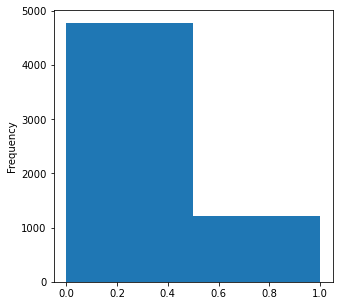

In [39]:
# current balance sheet situation
class_frequency = data['exited'].value_counts(normalize=True, ascending=False)
print(class_frequency)
target_train.plot(kind ='hist', bins=2, figsize=(5, 5));

Let's get rid of class imbalance. To do this, we will increase the number of `1` by 4 times.

In [40]:
# use this function to increase the sample 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

1    0.50569
0    0.49431
Name: exited, dtype: float64


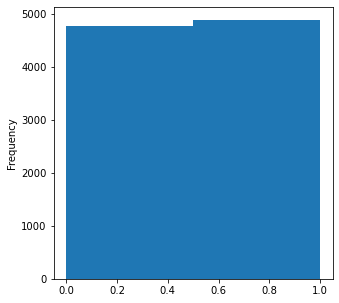

In [41]:
# current balance sheet situation
class_frequency = target_upsampled.value_counts(normalize=True, ascending=False)
print(class_frequency)
target_upsampled.plot(kind ='hist', bins=2, figsize=(5, 5));

Now we have balanced class values. You can move on to training models on it. In addition, to account for the balance, let's try to use the `class_weight` parameter on unbalanced samples.

### Training models on a balanced sample

In [42]:
# Decision tree function 
def decision_tree(features_train, target_train, features_valid, target_valid):
    best_model_decision_tree = None
    best_result_decision_tree = 0

    for samples_leaf in range(1, 4):
        for depth in range(1, 11):
            model = DecisionTreeClassifier(random_state=12345, 
                                           max_depth=depth, max_features='auto', 
                                           min_samples_leaf=samples_leaf)
            model.fit(features_train, target_train) 
            predictions_valid_decision_tree = model.predict(features_valid)
            result = accuracy_score(target_valid, predictions_valid_decision_tree)
            if result > best_result_decision_tree:
                best_model_decision_tree = model 
                best_result_decision_tree = result
                best_max_depth = depth
                best_samples_leaf = samples_leaf
                best_max_features = features

    decision_tree_params = {'max_depth': range(1, 11), 
                            'min_samples_leaf' : range(1, 4)}
    model_grid = GridSearchCV(model, decision_tree_params, 
                              cv=5, n_jobs=-1, verbose=True)
    model_grid.fit(features_train, target_train)


    print('For validation set:')
    print('Quality of the model on the validation set:', best_result_decision_tree)
    print('Optimal parameters on the validation set:')
    print('max_depth = ', best_max_depth)
    print('min_samples_leaf = ', best_samples_leaf)
    print()
    print('For cross-validation:')
    print('Best parameters:', model_grid.best_params_)
    print('Best score:', model_grid.best_score_)
    print('Average score of correct answers:', accuracy_score(target_valid, model_grid.predict(features_valid)))
    
    return best_model_decision_tree
    
best_model_decision_tree = decision_tree(features_upsampled, target_upsampled, features_valid, target_valid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
For validation set:
Quality of the model on the validation set: 0.792
Optimal parameters on the validation set:
max_depth =  7
min_samples_leaf =  3

For cross-validation:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1}
Best score: 0.7889512740937219
Average score of correct answers: 0.7625


In [43]:
# Random Forest Function
def random_forest(features_train, target_train, features_valid, target_valid):
    
    best_model_random_forest = None
    best_result_random_forest = 0

    for est in range(1, 50):
        for depth in range(1, 11):
            model = RandomForestClassifier(random_state=12345, 
                                           n_estimators=est, max_depth=depth, 
                                           max_features='auto')
            model.fit(features_train, target_train) 
            predictions_valid = model.predict(features_valid)
            result = accuracy_score(predictions_valid, target_valid)
            if result > best_result_random_forest:
                best_model_random_forest = model
                best_result_random_forest = result
                best_max_depth = depth
                best_n_estimators = est
                
    forest_params = {'max_depth': range(1, 11),
                     'n_estimators' : range(1, 50)}

    model_grid = GridSearchCV(model, forest_params,
                              cv=5, n_jobs=-1,
                              verbose=True)

    model_grid.fit(features_train, target_train)

    print('For validation set:')
    print('Quality of the model on the validation set:', best_result_random_forest)
    print('Optimal parameters on the validation set:')
    print('max_depth = ', best_max_depth)
    print('n_estimators = ', best_n_estimators)
    print()
    print('For cross-validation:')
    print('Best parameters:', model_grid.best_params_)
    print('Best score:', model_grid.best_score_)
    print('Average score of correct answers:', accuracy_score(target_valid, model_grid.predict(features_valid)))
    
    return best_model_random_forest

best_model_random_forest = random_forest(features_upsampled, target_upsampled, features_valid, target_valid)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
For validation set:
Quality of the model on the validation set: 0.8355
Optimal parameters on the validation set:
max_depth =  10
n_estimators =  49

For cross-validation:
Best parameters: {'max_depth': 10, 'n_estimators': 49}
Best score: 0.8710945955272036
Average score of correct answers: 0.8355


In [44]:
# Function for logistic regression
def logistic_regression(features_train, target_train, features_valid, target_valid):
    
    # Check solver='lbfgs'
    best_model_logistic_regression = None
    best_result_logistic_regression = 0

    for iter_value in range(100, 1000, 10):
        model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter_value)
        model.fit(features_train, target_train)
        model.predict(features_valid)
        result = model.score(features_valid, target_valid)
        if result > best_result_logistic_regression:
            best_model_logistic_regression = model
            best_result_logistic_regression = result
            best_max_iter = iter_value

    # Check solver='liblinear'
    best_model_logistic_regression = None
    best_result_logistic_regression = 0

    for i in range(100, 1000, 10):
        model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=i)
        model.fit(features_train, target_train)
        model.predict(features_valid)
        result = model.score(features_valid, target_valid)        
        if result > best_result_logistic_regression:
            best_model_logistic_regression = model
            best_result_logistic_regression = result
            best_max_iter = iter_value

    # Check solver='saga'
    model = LogisticRegression(random_state=12345, solver='saga', max_iter=1000)
    model.fit(features_train, target_train)
    model.predict(features_valid)
    model.score(features_valid, target_valid)

    print('For lbfgs:')
    print('Best estimate:', best_result_logistic_regression)
    print('Optimal number of iterations:', best_max_iter)
    print()
    print('For liblinear:')
    print('Best estimate:', best_result_logistic_regression)
    print('Optimal number of iterations:', best_max_iter)
    print()
    print('For saga:')
    print('Best Score:', model.score(features_valid, target_valid))
    
    return best_model_logistic_regression

best_model_logistic_regression = logistic_regression(features_upsampled, target_upsampled, features_valid, target_valid)

For lbfgs:
Best estimate: 0.7105
Optimal number of iterations: 990

For liblinear:
Best estimate: 0.7105
Optimal number of iterations: 990

For saga:
Best Score: 0.71


In [45]:
#Decision tree
decision_tree_prediction_upsampled = best_model_decision_tree.predict(features_valid)
rec_prec_f1(target_valid, decision_tree_prediction_upsampled)

completeness 0.5759803921568627
Accuracy 0.4916317991631799
F1-measure 0.5304740406320543
AUC-ROC 0.7116711006010444


In [46]:
#Random forest
random_forest_prediction_upsampled = best_model_random_forest.predict(features_valid)
rec_prec_f1(target_valid, random_forest_prediction_upsampled) 

completeness 0.6470588235294118
Accuracy 0.5879732739420935
F1-measure 0.61610268378063
AUC-ROC 0.765426396689329


In [47]:
logistic_regression_prediction_upsampled = best_model_logistic_regression.predict(features_valid)
rec_prec_f1(target_valid, logistic_regression_prediction_upsampled) 

completeness 0.678921568627451
Accuracy 0.3820689655172414
F1-measure 0.48896734333627545
AUC-ROC 0.6987572667257859


The quality of all models has improved markedly. This is noticeable by changes in metrics (in particular `F_1`).
Random forest gives the best result.

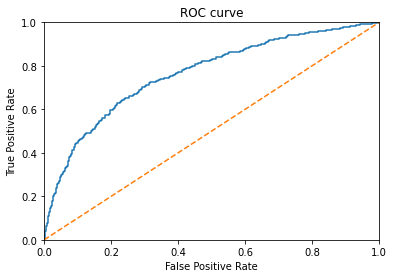

In [48]:
# ROC curve for logistic regression without imbalance
probabilities_one_valid = best_model_logistic_regression.predict_proba(features_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### Training models with weights

Let's take the most proven model, and check it when training with weights.

In [49]:
# Decision tree function
def decision_tree(features_train, target_train, features_valid, target_valid):
    best_model_decision_tree = None
    best_result_decision_tree = 0

    for samples_leaf in range(1, 4):
        for depth in range(1, 11):
            model = DecisionTreeClassifier(random_state=12345, 
                                           max_depth=depth, max_features='auto', 
                                           min_samples_leaf=samples_leaf,
                                           class_weight = 'balanced')
            model.fit(features_train, target_train) 
            predictions_valid_decision_tree = model.predict(features_valid)
            result = accuracy_score(target_valid, predictions_valid_decision_tree)
            if result > best_result_decision_tree:
                best_model_decision_tree = model 
                best_result_decision_tree = result
                best_max_depth = depth
                best_samples_leaf = samples_leaf
                best_max_features = features

    decision_tree_params = {'max_depth': range(1, 11), 
                            'min_samples_leaf' : range(1, 4)}
    model_grid = GridSearchCV(model, decision_tree_params, 
                              cv=5, n_jobs=-1, verbose=True)
    model_grid.fit(features_train, target_train)


    print('For validation set:')
    print('Quality of the model on the validation set:', best_result_decision_tree)
    print('Optimal parameters on the validation set:')
    print('max_depth = ', best_max_depth)
    print('min_samples_leaf = ', best_samples_leaf)
    print()
    print('For cross-validation:')
    print('Best parameters:', model_grid.best_params_)
    print('Best score:', model_grid.best_score_)
    print('Average score of correct answers:', accuracy_score(target_valid, model_grid.predict(features_valid)))
    
    decision_tree_prediction_upsampled = best_model_decision_tree.predict(features_valid)
    rec_prec_f1(target_valid, decision_tree_prediction_upsampled)
    
decision_tree(features_train, target_train, features_valid, target_valid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
For validation set:
Quality of the model on the validation set: 0.782
Optimal parameters on the validation set:
max_depth =  9
min_samples_leaf =  3

For cross-validation:
Best parameters: {'max_depth': 7, 'min_samples_leaf': 2}
Best score: 0.7805
Average score of correct answers: 0.7595
completeness 0.6102941176470589
Accuracy 0.47338403041825095
F1-measure 0.5331905781584584
AUC-ROC 0.7181495713863435


In [50]:
# Function for random forest
def random_forest(features_train, target_train, features_valid, target_valid):
    
    best_model_random_forest = None
    best_result_random_forest = 0

    for est in range(1, 50):
        for depth in range(1, 11):
            model = RandomForestClassifier(random_state=12345, 
                                           n_estimators=est, max_depth=depth, 
                                           max_features='auto',
                                           class_weight = 'balanced')
            model.fit(features_train, target_train) 
            predictions_valid = model.predict(features_valid)
            result = accuracy_score(predictions_valid, target_valid)
            if result > best_result_random_forest:
                best_model_random_forest = model
                best_result_random_forest = result
                best_max_depth = depth
                best_n_estimators = est
                
    forest_params = {'max_depth': range(1, 11),
                     'n_estimators' : range(1, 50)}

    model_grid = GridSearchCV(model, forest_params,
                              cv=5, n_jobs=-1,
                              verbose=True)

    model_grid.fit(features_train, target_train)

    print('For validation set:')
    print('Quality of the model on the validation set:", best_result_random_forest)
    print('Optimal parameters on the validation set:")
    print('max_depth = ', best_max_depth)
    print('n_estimators = ', best_n_estimators)
    print()
    print('For cross-validation:')
    print('Best parameters:', model_grid.best_params_)
    print('Best score:', model_grid.best_score_)
    print('Average score of correct answers:', accuracy_score(target_valid, model_grid.predict(features_valid)))
    
    random_forest_prediction_upsampled = best_model_random_forest.predict(features_valid)
    rec_prec_f1(target_valid, random_forest_prediction_upsampled) 
    
    return best_model_random_forest

best_model_random_forest_balanced = random_forest(features_train, target_train, features_valid, target_valid)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_6784/4262070419.py, line 32)

In [ ]:
# Function for logistic regression
def logistic_regression(features_train, target_train, features_valid, target_valid):
    
    # Check solver='lbfgs'
    best_model_logistic_regression = None
    best_result_logistic_regression = 0

    for iter_value in range(100, 1000, 10):
        model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter_value, class_weight = 'balanced')
        model.fit(features_train, target_train)
        model.predict(features_valid)
        result = model.score(features_valid, target_valid)
        if result > best_result_logistic_regression:
            best_model_logistic_regression = model
            best_result_logistic_regression = result
            best_max_iter = iter_value

    # Check solver='liblinear'
    best_model_logistic_regression = None
    best_result_logistic_regression = 0

    for i in range(100, 1000, 10):
        model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=i)
        model.fit(features_train, target_train)
        model.predict(features_valid)
        result = model.score(features_valid, target_valid)        
        if result > best_result_logistic_regression:
            best_model_logistic_regression = model
            best_result_logistic_regression = result
            best_max_iter = iter_value

    # Check solver='saga'
    model = LogisticRegression(random_state=12345, solver='saga', max_iter=1000)
    model.fit(features_train, target_train)
    model.predict(features_valid)
    model.score(features_valid, target_valid)

    print('For lbfgs:')
    print('Best estimate:', best_result_logistic_regression)
    print('Optimal number of iterations:', best_max_iter)
    print()
    print('For liblinear:')
    print('Best estimate:', best_result_logistic_regression)
    print('Optimal number of iterations:', best_max_iter)
    print()
    print('For saga:')
    print('Best Score:', model.score(features_valid, target_valid))
    
    logistic_regression_prediction_upsampled = best_model_logistic_regression.predict(features_valid)
    rec_prec_f1(target_valid, logistic_regression_prediction_upsampled) 

logistic_regression(features_train, target_train, features_valid, target_valid)

When using the `class_weight` parameter, the models perform worse than with the increased sample.

## Model testing

In [ ]:
#Create a constant model
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.value_counts()

In [ ]:
# When increasing the sample
random_forest_final_prediction = best_model_random_forest.predict(features_test)
rec_prec_f1(target_test, random_forest_final_prediction)

In [ ]:
# When balancing
random_forest_balanced_final_prediction = best_model_random_forest_balanced.predict(features_test)
rec_prec_f1(target_test, random_forest_balanced_final_prediction)

In [ ]:
# accuracy score of the constant model and the final random forest with balance
print('accuracy_score with model constant:', accuracy_score(target_test, target_predict_constant))
print('accuracy_score of final model with balance:', accuracy_score(target_test, random_forest_balanced_final_prediction))
# accuracy score of the constant model and the final random forest
print('accuracy_score with model constant:', accuracy_score(target_test, target_predict_constant))
print('accuracy_score of the final model:', accuracy_score(target_test, random_forest_final_prediction))
#AUC-ROC
print('AUC-ROC model constant:', roc_auc_score(target_test, target_predict_constant))
print('AUC-ROC of final model:', roc_auc_score(target_test, random_forest_final_prediction))
print('AUC-ROC of final model with balance:', roc_auc_score(target_test, random_forest_balanced_final_prediction))

According to the test results, the model trained on the increased sample showed the best result. It is in `best_model_random_forest`. The model using the balance parameter also showed good results. Both models passed the adequacy test.

## Conclusion

1. In the course of this study, an imbalance (1 to 4) was found on the target attribute. Due to this imbalance, the models did not pass the test for adequacy during training, so upsampling and training on initial data with the `class_weight` parameter was applied.

2. The balance of the target feature was restored 0.51 to 0.49 and the models showed a more acceptable result. The best performance on the validation set was in the random forest.
    - Fullness = 0.65
    - Accuracy = 0.59
    - F1-measure = 0.62
    - AUC-ROC = 0.77
    
3. Best parameters: {'max_depth': 10, 'n_estimators': 49}, model saved in `best_model_random_forest`.

4. As a result, it was possible to achieve the parameter F1 > 0.59. The model predicts well the probability of a client leaving - 65%, but slightly more than half of the exits 59%
